In [1952]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

Load data, get info

In [1953]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


Preparing data

Column verification.result has bool type we need convert it to number value

In [1954]:
# Convert bool values to number values
df['verification.result'] = df['verification.result'].astype(int)
df.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,0,163.316667
1,0,0,2,1,59,2,0,0,200.860000
2,0,0,2,1,59,4,0,0,154.888889
3,0,0,2,1,59,6,0,0,108.640000
4,0,0,2,1,60,1,0,1,85.466667


For now data has no Nan values and number value

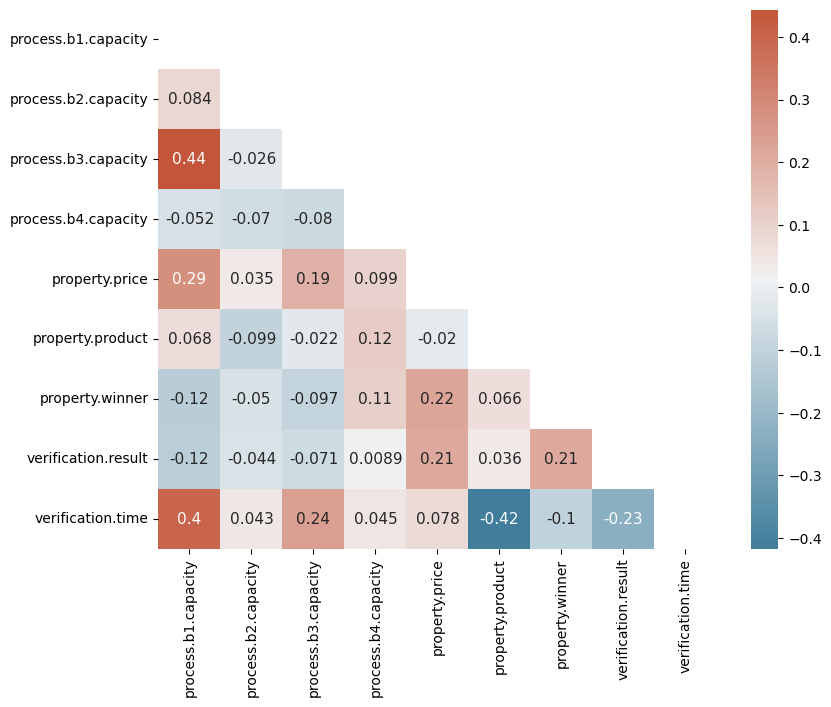

In [1955]:
# Build correlation matrix
corr_matrix = df.corr()

# Set plot sixe 
plt.figure(figsize=(9, 7))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
# Visualize correlation matrix
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, annot_kws={"fontsize":11})

# Show plot
plt.show()

In the correlation matrix we can observe that data has acceptable values and nothing requereds to change

Add new features 


In [1956]:
# Create new features 
df['div'] = df['property.price'] / df['verification.time']
df['mul'] = df['verification.time'] * df['verification.result']

df.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time,div,mul
0,0,0,2,1,59,1,0,0,163.316667,0.361261,0.000000
1,0,0,2,1,59,2,0,0,200.860000,0.293737,0.000000
2,0,0,2,1,59,4,0,0,154.888889,0.380918,0.000000
3,0,0,2,1,59,6,0,0,108.640000,0.543078,0.000000
4,0,0,2,1,60,1,0,1,85.466667,0.702028,85.466667


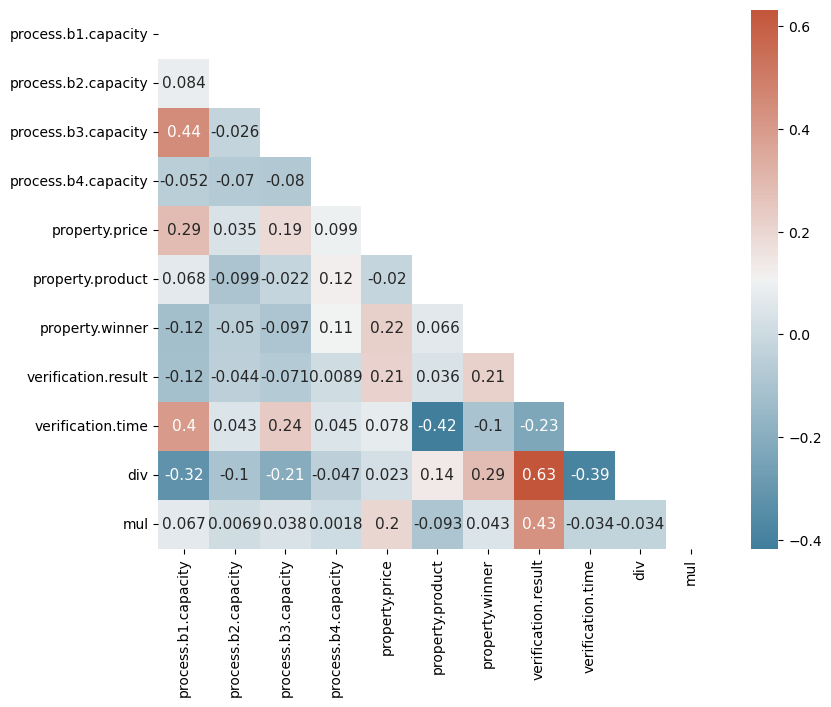

In [1957]:
# Build correlation matrix
corr_matrix = df.corr()

# Set plot sixe 
plt.figure(figsize=(9, 7))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
# Visualize correlation matrix
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, annot_kws={"fontsize":11})

# Show plot
plt.show()

I added a few new features and result became much better, will see on the prediction result.

Scale and split the data


In [1958]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['verification.result'])
y = df['verification.result']

In [1959]:
# Scale the data using StandardScaler
scaler = MinMaxScaler()

# Scale X 
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Bagging Classifier

In [1960]:
# Create a RandomForestClassifier
random_forest = RandomForestClassifier(
    n_estimators=50,        # Number of trees in the forest
    max_depth=5,            # Maximum depth of each tree
    random_state=42
)
# Create Begging Classifier
begging_clf = BaggingClassifier(
    estimator=random_forest,
    n_estimators=10,        # Number of RandomForest models in the bagging ensemble
    max_samples=0.8,        # Use 80% of the data for each random forest model
    bootstrap=True,         # Sampling with replacement
    random_state=42
)

# Perform Cross Validation
cv_sc = cross_val_score(begging_clf, X_train, y_train, cv=4)

print(f"Cross-Validation Scores: {cv_sc}")

Cross-Validation Scores: [1. 1. 1. 1.]


Ideal balance data set 

In [1961]:
# Train model
begging_clf.fit(X_train, y_train)

print(f'Train Score: {begging_clf.score(X_train, y_train)}')
print(f'Test Score: {begging_clf.score(X_test, y_test)}')

Train Score: 1.0
Test Score: 1.0


Train and test score equal to 1.0. We observe that Begging Clisiffire model is overfitting, even though I know that Begging Classifier works with overfitting I want to play aroung with different hyperparameters and look at the result.

In [1962]:
# Create a RandomForestClassifier
random_forest = RandomForestClassifier(
    n_estimators=11,        # Number of trees in the forest
    max_depth=2,            # Maximum depth of each tree
    random_state=42
)
# Create Begging Classifier
begging_clf = BaggingClassifier(
    estimator=random_forest,
    n_estimators=10,        # Number of RandomForest models in the bagging ensemble
    max_samples=0.8,        # Use 80% of the data for each random forest model
    bootstrap=True,         # Sampling with replacement
    random_state=42
)

# Perform Cross Validation
cv_sc = cross_val_score(begging_clf, X_train, y_train, cv=4)

print(f"Cross-Validation Scores: {cv_sc}")

Cross-Validation Scores: [0.99755501 0.97799511 0.9877451  0.99264706]


In [1963]:
# Train model
begging_clf.fit(X_train, y_train)

print(f'Train Score: {begging_clf.score(X_train, y_train)}')
print(f'Test Score: {begging_clf.score(X_test, y_test)}')

Train Score: 0.9908200734394125
Test Score: 0.9926650366748166


Much better. Let's try to get metric for this model 

In [1964]:
# Predict result
y_pred = begging_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       354
           1       1.00      0.95      0.97        55

    accuracy                           0.99       409
   macro avg       1.00      0.97      0.98       409
weighted avg       0.99      0.99      0.99       409

Confusion Matrix:
[[354   0]
 [  3  52]]


I've tried to descreese hyperparameters and finally we achieve ideal model when the model is not overfitting and return good metrics

Boost Classifier

In [1965]:
# Create LGBMClassifier 
lgbm_clf = LGBMClassifier(
    num_leaves=31,      # Number of leaves in each tree
    max_depth=-1,       # Maximum depth of the tree (-1 means no limit)
    learning_rate=0.05, # Step size shrinking to avoid overfitting
    n_estimators=20,    # Number of boosting iterations
    random_state=42     # Random state for reproducibility
)

# Train model
lgbm_clf.fit(X_train,y_train)

# Get scoress 
print(f'Train Score: {lgbm_clf.score(X_train, y_train)}')
print(f'Test Score: {lgbm_clf.score(X_test, y_test)}')

[LightGBM] [Info] Number of positive: 207, number of negative: 1427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126683 -> initscore=-1.930611
[LightGBM] [Info] Start training from score -1.930611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

Train and Test score equal 1.0 and we get the overfitting model again. Let's try to change hyperparameters, maybe it will help us.

In [1966]:
# Create LGBMClassifier 
lgbm_clf = LGBMClassifier(
    num_leaves=10,      
    max_depth=-1,       
    learning_rate=0.05, 
    n_estimators=10,    # Number of boosting iterations decreas from 20 to 10
    random_state=42      
)

# Train model
lgbm_clf.fit(X_train,y_train)

# Get scoress 
print(f'Train Score: {lgbm_clf.score(X_train, y_train)}')
print(f'Test Score: {lgbm_clf.score(X_test, y_test)}')

[LightGBM] [Info] Number of positive: 207, number of negative: 1427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126683 -> initscore=-1.930611
[LightGBM] [Info] Start training from score -1.930611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

The minimum number of estimator is 10 which give us normal model and not overfitting. Other hyperparameters are not leverage to the result. 

In [1967]:
# Predict result
y_pred = lgbm_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       354
           1       0.00      0.00      0.00        55

    accuracy                           0.87       409
   macro avg       0.43      0.50      0.46       409
weighted avg       0.75      0.87      0.80       409

Confusion Matrix:
[[354   0]
 [ 55   0]]


The boost model shows worse result than bagging model. Second variable is 100% of False Negative